# High and low resolution simulation annual cycles

All analyses are in: 
- `HR_simulation_analyses_scf_MODIS.ipynb`
- `LR_simulation_analyses_scf_MODIS.ipynb`

conda env: new `phd_v3` (in `envs/phd`)

## Simulations HR

- NY07: LMDZORnudge-uvt-6h-10d-noBL-STD-NY07-HR-2004-2008
- SL12: LMDZORnudge-uvt-6h-10d-noBL-STD-SL12-HR-2004-2008
- LA22: LMDZORnudge-uvt-6h-10d-noBL-STD-LA22-HR-2004-2008

## Path to simulations HR

- Jean-Zay WORK: `/gpfsdswork/projects/rech/goe/ufz23bm/SCA_parameterization/modipsl/config/LMDZOR_v6/`
- Jean-Zay STORE: `/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/DEVT/amip/`
- THREDDS: `/gpfsdsmnt/ipsl/dods/pub/ufz23bm/LMDZOR/DEVT/amip/`
- CICLAD: `/thredds/idris/work/ufz23bm/LMDZOR/DEVT/amip/` 
- local: `~/Dropbox/data/IGCM_OUT/LMDZOR/DEVT/amip/`
- https://vesg.ipsl.upmc.fr/thredds/catalog/idris_work/ufz23bm/LMDZOR/DEVT/amip/


## Simulations LR 

- NY07: LMDZORnudge-uvt-6h-10d-noBL-STD-NY07-2004-2008
- R01: LMDZORnudge-uvt-6h-10d-noBL-STD-R01-2004-2008
- SL12: LMDZORnudge-uvt-6h-10d-noBL-STD-SL12-2004-2008
- LA22: LMDZORnudge-uvt-6h-10d-noBL-STD-LA22-2004-2008

## Path to simulations LR

- Jean-Zay WORK: `/gpfsdswork/projects/rech/goe/ufz23bm/SCA_parameterization/modipsl/config/LMDZOR_v6/`
- Jean-Zay STORE: `/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/DEVT/amip/`
- THREDDS: `/gpfsdsmnt/ipsl/dods/pub/ufz23bm/LMDZOR/DEVT/amip/`
- CICLAD: `/thredds/idris/work/ufz23bm/LMDZOR/DEVT/amip/` 
- local: `~/Dropbox/data/IGCM_OUT/LMDZOR/DEVT/amip/`
- https://vesg.ipsl.upmc.fr/thredds/catalog/idris_work/ufz23bm/LMDZOR/DEVT/amip/

## Import modules

In [46]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar

import sys
sys.path.insert(1, '../utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]
Virtual memory usage - total: 31 GB / available: 10 GB / percent used: 67.2 %


## Define paths

In [47]:
# root = '/thredds/idris/work/ufz23bm/LMDZOR/DEVT/amip/' # CICLAD
root_HR = '/home/lalandmi/Dropbox/data/IGCM_OUT/LMDZOR/DEVT/amip/' # local

exp_NY07_HR = 'LMDZORnudge-uvt-6h-10d-noBL-STD-NY07-HR-2004-2008'
exp_SL12_HR = 'LMDZORnudge-uvt-6h-10d-noBL-STD-SL12-HR-2004-2008'
exp_LA22_HR = 'LMDZORnudge-uvt-6h-10d-noBL-STD-LA22-HR-2004-2008'

# 1 year spin-up
period = slice('2005', '2008')

In [48]:
# root = '/thredds/idris/work/ufz23bm/LMDZOR/DEVT/amip/' # CICLAD
root_LR = '/home/lalandmi/Dropbox/data/IGCM_OUT/LMDZOR/DEVT/amip/' # local

exp_NY07_LR = 'LMDZORnudge-uvt-6h-10d-noBL-STD-NY07-2004-2008'
exp_R01_LR = 'LMDZORnudge-uvt-6h-10d-noBL-STD-R01-2004-2008'
exp_SL12_LR = 'LMDZORnudge-uvt-6h-10d-noBL-STD-SL12-2004-2008'
exp_LA22_LR = 'LMDZORnudge-uvt-6h-10d-noBL-STD-LA22-2004-2008'


## Load model data

In [5]:
scf_NY07_HR = xr.open_dataset(root_HR+exp_NY07_HR+'/SRF/Analyse/TS_MO/'+exp_NY07_HR+'_20040101_20081231_1M_frac_snow.nc').frac_snow.rename({'time_counter': 'time'}).sortby('lat').sel(time=period)
scf_SL12_HR = xr.open_dataset(root_HR+exp_SL12_HR+'/SRF/Analyse/TS_MO/'+exp_SL12_HR+'_20040101_20081231_1M_frac_snow.nc').frac_snow.rename({'time_counter': 'time'}).sortby('lat').sel(time=period)
scf_LA22_HR = xr.open_dataset(root_HR+exp_LA22_HR+'/SRF/Analyse/TS_MO/'+exp_LA22_HR+'_20040101_20081231_1M_frac_snow.nc').frac_snow.rename({'time_counter': 'time'}).sortby('lat').sel(time=period)

In [6]:
scf_NY07_LR = xr.open_dataset(root_LR+exp_NY07_LR+'/SRF/Analyse/TS_MO/'+exp_NY07_LR+'_20040101_20081231_1M_frac_snow.nc').frac_snow.rename({'time_counter': 'time'}).sortby('lat').sel(time=period)
scf_R01_LR = xr.open_dataset(root_LR+exp_R01_LR+'/SRF/Analyse/TS_MO/'+exp_R01_LR+'_20040101_20081231_1M_frac_snow.nc').frac_snow.rename({'time_counter': 'time'}).sortby('lat').sel(time=period)
scf_SL12_LR = xr.open_dataset(root_LR+exp_SL12_LR+'/SRF/Analyse/TS_MO/'+exp_SL12_LR+'_20040101_20081231_1M_frac_snow.nc').frac_snow.rename({'time_counter': 'time'}).sortby('lat').sel(time=period)
scf_LA22_LR = xr.open_dataset(root_LR+exp_LA22_LR+'/SRF/Analyse/TS_MO/'+exp_LA22_LR+'_20040101_20081231_1M_frac_snow.nc').frac_snow.rename({'time_counter': 'time'}).sortby('lat').sel(time=period)

## Load observations

In [7]:
snc_MODIS_05deg = xr.open_mfdataset('/home/lalandmi/Dropbox/data/ESA_CCI_SNOW/preprocess/scfg/MODIS/v2.0/monthly_0.5deg/*.nc')['scfg_interp_0.5deg_icefilled'].sel(time=period)
snc_MODIS_05deg['time'] = scf_NY07_HR.time
snc_AVHRR_05deg = xr.open_mfdataset('/home/lalandmi/Dropbox/data/ESA_CCI_SNOW/preprocess/scfg/AVHRR_MERGED/v2.0/monthly_0.5deg/*.nc')['scfg_interp_0.5deg_icefilled'].sel(time=period)
snc_AVHRR_05deg['time'] = scf_NY07_HR.time

In [8]:
regridder = xe.Regridder(snc_MODIS_05deg, scf_NY07_HR, 'bilinear', periodic=True, reuse_weights=False)
snc_MODIS_05deg_regrid = regridder(snc_MODIS_05deg)
snc_AVHRR_05deg_regrid = regridder(snc_AVHRR_05deg)

Overwrite existing file: bilinear_360x720_361x512_peri.nc 
 You can set reuse_weights=True to save computing time.


In [10]:
snc_MODIS_1deg = xr.open_mfdataset('/home/lalandmi/Dropbox/data/ESA_CCI_SNOW/preprocess/scfg/MODIS/v2.0/monthly_1deg/*.nc')['scfg_interp_1deg_icefilled'].sel(time=period)
snc_MODIS_1deg['time'] = scf_NY07_LR.time
snc_AVHRR_1deg = xr.open_mfdataset('/home/lalandmi/Dropbox/data/ESA_CCI_SNOW/preprocess/scfg/AVHRR_MERGED/v2.0/monthly_1deg/*.nc')['scfg_interp_1deg_icefilled'].sel(time=period)
snc_AVHRR_1deg['time'] = scf_NY07_LR.time

In [11]:
regridder = xe.Regridder(snc_MODIS_1deg, scf_NY07_LR, 'bilinear', periodic=True, reuse_weights=True)
snc_MODIS_1deg_regrid = regridder(snc_MODIS_1deg)
snc_AVHRR_1deg_regrid = regridder(snc_AVHRR_1deg)

Reuse existing file: bilinear_180x360_143x144_peri.nc


## Load topo

In [9]:
# grid_HR = xr.open_dataset('/home/lalandmi/Dropbox/data/IGCM_OUT/ELI-512x360x79-GMTED-STD-amip_2004_grilles_gcm.nc')

# topo_HR = u.phys2dyn(xr.open_dataset('/home/lalandmi/Dropbox/data/IGCM_OUT/ELI-512x360x79-GMTED-STD-amip_2004_startphy.nc').ZMEA_NOT_FILTERED, grid_HR)
# std_HR = u.phys2dyn(xr.open_dataset('/home/lalandmi/Dropbox/data/IGCM_OUT/ELI-512x360x79-GMTED-STD-amip_2004_startphy.nc').ZSTD_NOT_FILTERED, grid_HR)

# # To have same lon from -180 to 180
# regridder = xe.Regridder(topo_HR, scf_NY07, 'bilinear', periodic=True, reuse_weights=True)
# topo_HR_regrid = regridder(topo_HR)
# std_HR_regrid = regridder(std_HR)

# topo_HR_regrid.to_netcdf('topo_HR_regrid.nc')
# std_HR_regrid.to_netcdf('std_HR_regrid.nc')

Create weight file: bilinear_361x512_361x512_peri.nc


In [49]:
topo_HR_regrid = xr.open_dataarray('topo_HR_regrid.nc')
std_HR_regrid = xr.open_dataarray('std_HR_regrid.nc')

topo_LR_regrid = xr.open_dataarray('topo_LR_regrid.nc')
std_LR_regrid = xr.open_dataarray('std_LR_regrid.nc')

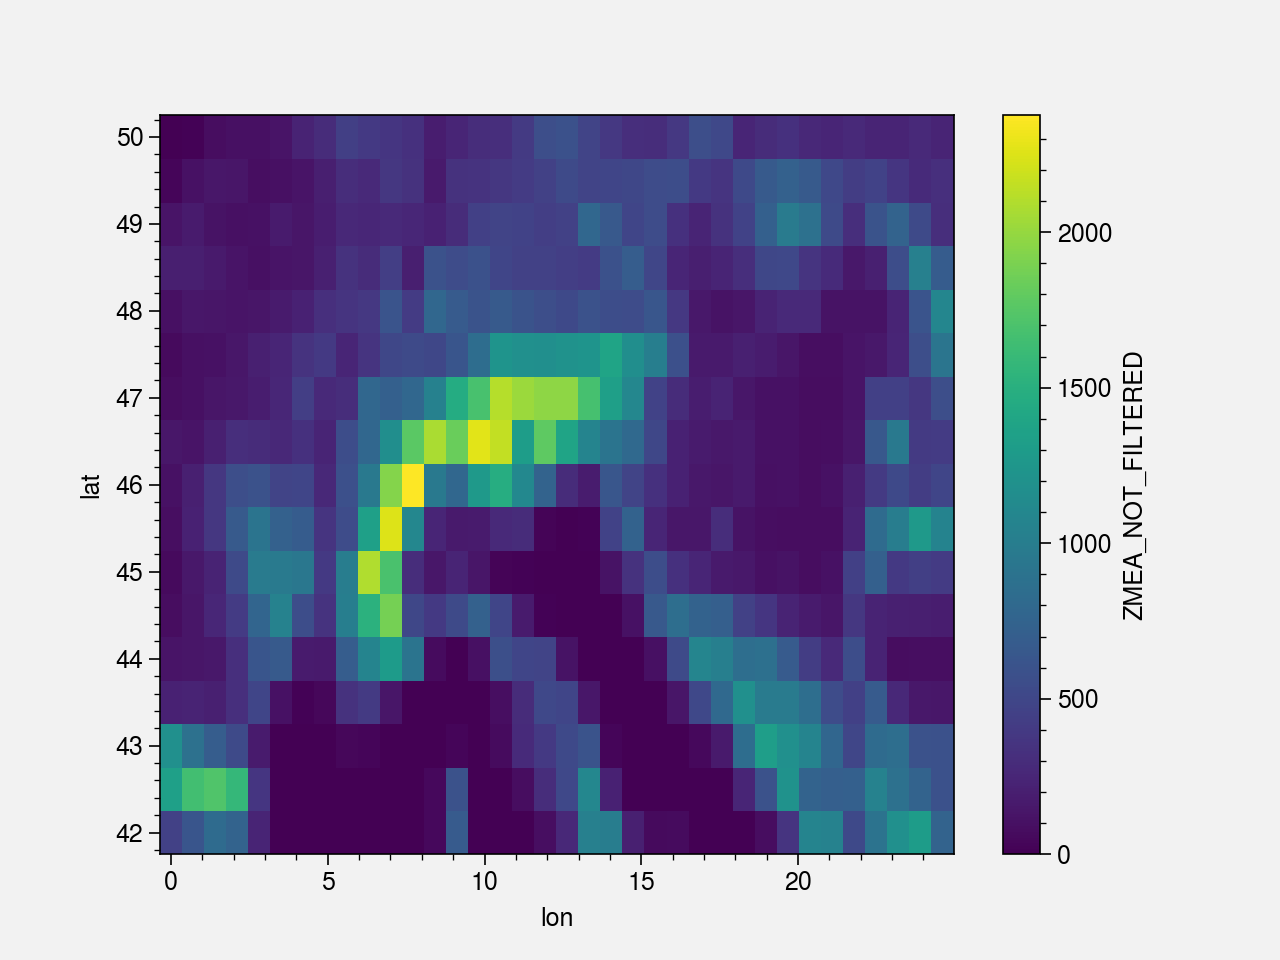

In [55]:
topo_HR_regrid.sel(lat=slice(42, 50), lon=slice(0, 25)).plot()

In [57]:
topo_HR_regrid.sel(lat=slice(42, 50), lon=slice(0, 25)).max()

<xarray.DataArray 'ZMEA_NOT_FILTERED' ()>
array(2375.89306641)

In [58]:
topo_LR_regrid.sel(lat=slice(42, 50), lon=slice(0, 25)).max()

<xarray.DataArray 'ZMEA_NOT_FILTERED' ()>
array(1720.61560059)

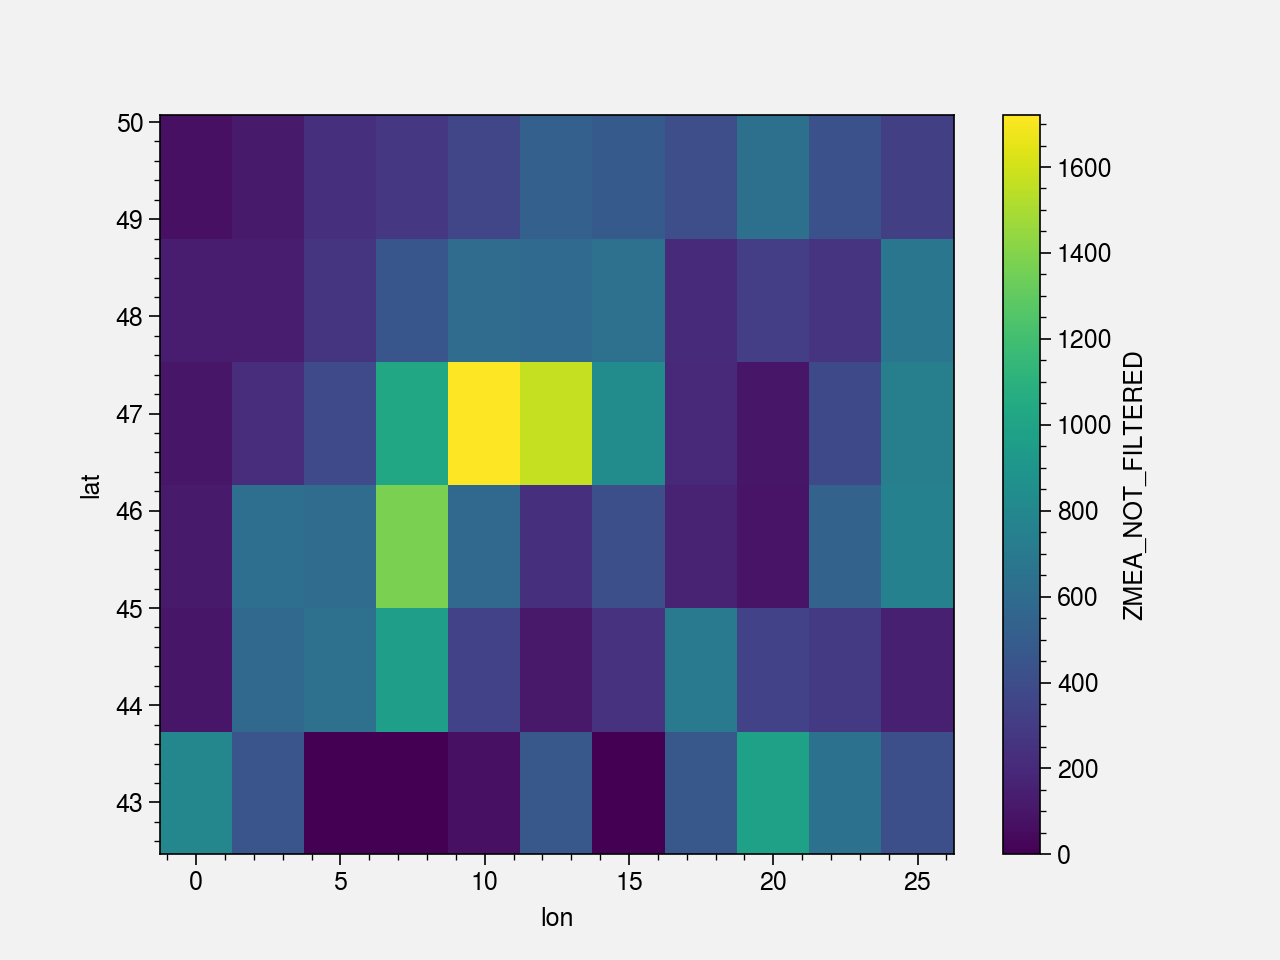

In [56]:
topo_LR_regrid.sel(lat=slice(42, 50), lon=slice(0, 25)).plot()

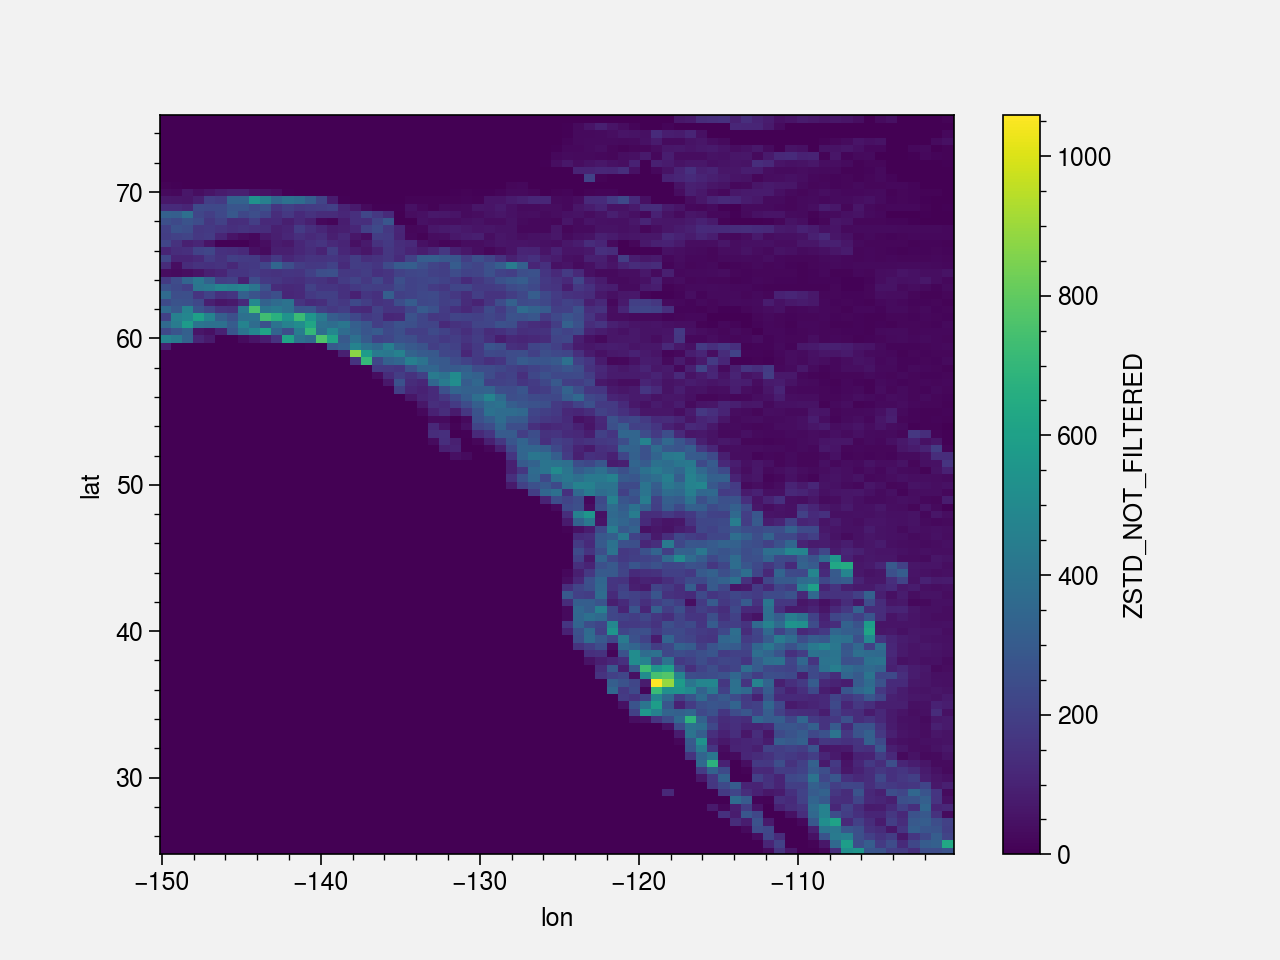

In [61]:
std_HR_regrid.sel(lat=slice(25, 75), lon=slice(-150, -100)).plot()

## Plot

In [13]:
lat_slice_HMA, lon_slice_HMA = u.get_domain_HMA()

# Zones
latlim_SA = slice(-60, -10); lonlim_SA = slice(-80, -60)
latlim_US = slice(20, 70); lonlim_US = slice(-165, -85)
latlim_EU = slice(30, 80); lonlim_EU = slice(0, 20)
latlim_HMA = slice(20, 55); lonlim_HMA = slice(60, 116)

## HR

In [14]:
ts_MODIS_NH_mountain_HR = u.spatial_average(snc_MODIS_05deg_regrid.groupby('time.month').mean().where( (snc_MODIS_05deg_regrid.lat > 0) & (snc_MODIS_05deg_regrid.lat < 60) ).where(std_HR_regrid > 200))
ts_AVHRR_NH_mountain_HR = u.spatial_average(snc_AVHRR_05deg_regrid.groupby('time.month').mean().where( (snc_AVHRR_05deg_regrid.lat > 0) & (snc_AVHRR_05deg_regrid.lat < 60) ).where(std_HR_regrid > 200))

params = ['NY07', 'SL12', 'LA22']
for i, da in enumerate([scf_NY07_HR, scf_SL12_HR, scf_LA22_HR]):
    ts = u.spatial_average(da.where(snc_MODIS_05deg_regrid*0 == 0).groupby('time.month').mean().where( (da.lat > 0) & (da.lat < 60) ).where(std_HR_regrid > 200))
    ts.name = params[i]
    
    rmse = np.sqrt(u.spatial_average((snc_MODIS_05deg_regrid.groupby('time.month').mean().where( (snc_MODIS_05deg_regrid.lat > 0) & (snc_MODIS_05deg_regrid.lat < 60) ).where(std_HR_regrid > 200) - \
            da.where(snc_MODIS_05deg_regrid*0 == 0).groupby('time.month').mean().where( (da.lat > 0) & (da.lat < 60) ).where(std_HR_regrid > 200))**2))
    rmse.name = params[i]
    
    if i == 0:
        ds_NH_mountain_HR = ts.to_dataset()
        ds_NH_mountain_rmse_HR = rmse.to_dataset()
    
    ds_NH_mountain_HR[params[i]] = ts
    ds_NH_mountain_rmse_HR[params[i]] = rmse

In [15]:
ts_MODIS_NH_flat_HR = u.spatial_average(snc_MODIS_05deg_regrid.groupby('time.month').mean().where( (snc_MODIS_05deg_regrid.lat > 0) & (snc_MODIS_05deg_regrid.lat < 60) ).where(std_HR_regrid < 200))
ts_AVHRR_NH_flat_HR = u.spatial_average(snc_AVHRR_05deg_regrid.groupby('time.month').mean().where( (snc_AVHRR_05deg_regrid.lat > 0) & (snc_AVHRR_05deg_regrid.lat < 60) ).where(std_HR_regrid < 200))

params = ['NY07', 'SL12', 'LA22']
for i, da in enumerate([scf_NY07_HR, scf_SL12_HR, scf_LA22_HR]):
    ts = u.spatial_average(da.where(snc_MODIS_05deg_regrid*0 == 0).groupby('time.month').mean().where( (da.lat > 0) & (da.lat < 60) ).where(std_HR_regrid < 200))
    ts.name = params[i]
    
    rmse = np.sqrt(u.spatial_average((snc_MODIS_05deg_regrid.groupby('time.month').mean().where( (snc_MODIS_05deg_regrid.lat > 0) & (snc_MODIS_05deg_regrid.lat < 60) ).where(std_HR_regrid < 200) - \
            da.where(snc_MODIS_05deg_regrid*0 == 0).groupby('time.month').mean().where( (da.lat > 0) & (da.lat < 60) ).where(std_HR_regrid < 200))**2))
    rmse.name = params[i]
    
    if i == 0:
        ds_NH_flat_HR = ts.to_dataset()
        ds_NH_flat_rmse_HR = rmse.to_dataset()
    
    ds_NH_flat_HR[params[i]] = ts
    ds_NH_flat_rmse_HR[params[i]] = rmse

In [16]:
params = ['NY07', 'SL12', 'LA22']
zones = ['US', 'EU', 'SA', 'HMA']
ds_list_MODIS_HR = [None]*len(zones)
ds_list_AVHRR_HR = [None]*len(zones)
ds_list_HR = [None]*len(zones)
ds_list_rmse_HR = [None]*len(zones)
for i, da in enumerate([scf_NY07_HR, scf_SL12_HR, scf_LA22_HR]):
    
    for i_zone, (latlim, lonlim) in enumerate(zip([latlim_US, latlim_EU, latlim_SA, latlim_HMA], [lonlim_US, lonlim_EU, lonlim_SA, lonlim_HMA])):
        ds_list_MODIS_HR[i_zone] = u.spatial_average(snc_MODIS_05deg_regrid.groupby('time.month').mean().where( (snc_MODIS_05deg_regrid.lat > -60) & (snc_MODIS_05deg_regrid.lat < 60) ).where(std_HR_regrid > 200).sel(lat=latlim, lon=lonlim))
        ds_list_AVHRR_HR[i_zone] = u.spatial_average(snc_AVHRR_05deg_regrid.groupby('time.month').mean().where( (snc_AVHRR_05deg_regrid.lat > -60) & (snc_AVHRR_05deg_regrid.lat < 60) ).where(std_HR_regrid > 200).sel(lat=latlim, lon=lonlim))
        
        ts = u.spatial_average(da.where(snc_MODIS_05deg_regrid*0 == 0).groupby('time.month').mean().where( (da.lat > -60) & (da.lat < 60) ).where(std_HR_regrid > 200).sel(lat=latlim, lon=lonlim))
        ts.name = params[i]

        rmse = np.sqrt(u.spatial_average((snc_MODIS_05deg_regrid.groupby('time.month').mean().where( (snc_MODIS_05deg_regrid.lat > -60) & (snc_MODIS_05deg_regrid.lat < 60) ).where(std_HR_regrid > 200).sel(lat=latlim, lon=lonlim) - \
                da.where(snc_MODIS_05deg_regrid*0 == 0).groupby('time.month').mean().where( (da.lat > -60) & (da.lat < 60) ).where(std_HR_regrid > 200).sel(lat=latlim, lon=lonlim))**2))
        rmse.name = params[i]

        if i == 0:
            ds_list_HR[i_zone] = ts.to_dataset()
            ds_list_rmse_HR[i_zone] = rmse.to_dataset()

        ds_list_HR[i_zone][params[i]] = ts
        ds_list_rmse_HR[i_zone][params[i]] = rmse

## LR

In [32]:
ts_MODIS_NH_mountain_LR = u.spatial_average(snc_MODIS_1deg_regrid.groupby('time.month').mean().where( (snc_MODIS_1deg_regrid.lat > 0) & (snc_MODIS_1deg_regrid.lat < 60) ).where(std_LR_regrid > 200))
ts_AVHRR_NH_mountain_LR = u.spatial_average(snc_AVHRR_1deg_regrid.groupby('time.month').mean().where( (snc_AVHRR_1deg_regrid.lat > 0) & (snc_AVHRR_1deg_regrid.lat < 60) ).where(std_LR_regrid > 200))

params = ['R01', 'NY07', 'SL12', 'LA22']
for i, da in enumerate([scf_R01_LR, scf_NY07_LR, scf_SL12_LR, scf_LA22_LR]):
    ts = u.spatial_average(da.where(snc_MODIS_1deg_regrid*0 == 0).groupby('time.month').mean().where( (da.lat > 0) & (da.lat < 60) ).where(std_LR_regrid > 200))
    ts.name = params[i]
    
    rmse = np.sqrt(u.spatial_average((snc_MODIS_1deg_regrid.groupby('time.month').mean().where( (snc_MODIS_1deg_regrid.lat > 0) & (snc_MODIS_1deg_regrid.lat < 60) ).where(std_LR_regrid > 200) - \
            da.where(snc_MODIS_1deg_regrid*0 == 0).groupby('time.month').mean().where( (da.lat > 0) & (da.lat < 60) ).where(std_LR_regrid > 200))**2))
    rmse.name = params[i]
    
    if i == 0:
        ds_NH_mountain_LR = ts.to_dataset()
        ds_NH_mountain_rmse_LR = rmse.to_dataset()
    
    ds_NH_mountain_LR[params[i]] = ts
    ds_NH_mountain_rmse_LR[params[i]] = rmse

In [33]:
ts_MODIS_NH_flat_LR = u.spatial_average(snc_MODIS_1deg_regrid.groupby('time.month').mean().where( (snc_MODIS_1deg_regrid.lat > 0) & (snc_MODIS_1deg_regrid.lat < 60) ).where(std_LR_regrid < 200))
ts_AVHRR_NH_flat_LR = u.spatial_average(snc_AVHRR_1deg_regrid.groupby('time.month').mean().where( (snc_AVHRR_1deg_regrid.lat > 0) & (snc_AVHRR_1deg_regrid.lat < 60) ).where(std_LR_regrid < 200))

params = ['R01', 'NY07', 'SL12', 'LA22']
for i, da in enumerate([scf_R01_LR, scf_NY07_LR, scf_SL12_LR, scf_LA22_LR]):
    ts = u.spatial_average(da.where(snc_MODIS_1deg_regrid*0 == 0).groupby('time.month').mean().where( (da.lat > 0) & (da.lat < 60) ).where(std_LR_regrid < 200))
    ts.name = params[i]
    
    rmse = np.sqrt(u.spatial_average((snc_MODIS_1deg_regrid.groupby('time.month').mean().where( (snc_MODIS_1deg_regrid.lat > 0) & (snc_MODIS_1deg_regrid.lat < 60) ).where(std_LR_regrid < 200) - \
            da.where(snc_MODIS_1deg_regrid*0 == 0).groupby('time.month').mean().where( (da.lat > 0) & (da.lat < 60) ).where(std_LR_regrid < 200))**2))
    rmse.name = params[i]
    
    if i == 0:
        ds_NH_flat_LR = ts.to_dataset()
        ds_NH_flat_rmse_LR = rmse.to_dataset()
    
    ds_NH_flat_LR[params[i]] = ts
    ds_NH_flat_rmse_LR[params[i]] = rmse

In [34]:
params = ['R01', 'NY07', 'SL12', 'LA22']
zones = ['US', 'EU', 'SA', 'HMA']
ds_list_MODIS_LR = [None]*len(zones)
ds_list_AVHRR_LR = [None]*len(zones)
ds_list_LR = [None]*len(zones)
ds_list_rmse_LR = [None]*len(zones)
for i, da in enumerate([scf_R01_LR, scf_NY07_LR, scf_SL12_LR, scf_LA22_LR]):
    
    for i_zone, (latlim, lonlim) in enumerate(zip([latlim_US, latlim_EU, latlim_SA, latlim_HMA], [lonlim_US, lonlim_EU, lonlim_SA, lonlim_HMA])):
        ds_list_MODIS_LR[i_zone] = u.spatial_average(snc_MODIS_1deg_regrid.groupby('time.month').mean().where( (snc_MODIS_1deg_regrid.lat > -60) & (snc_MODIS_1deg_regrid.lat < 60) ).where(std_LR_regrid > 200).sel(lat=latlim, lon=lonlim))
        ds_list_AVHRR_LR[i_zone] = u.spatial_average(snc_AVHRR_1deg_regrid.groupby('time.month').mean().where( (snc_AVHRR_1deg_regrid.lat > -60) & (snc_AVHRR_1deg_regrid.lat < 60) ).where(std_LR_regrid > 200).sel(lat=latlim, lon=lonlim))
        
        ts = u.spatial_average(da.where(snc_MODIS_1deg_regrid*0 == 0).groupby('time.month').mean().where( (da.lat > -60) & (da.lat < 60) ).where(std_LR_regrid > 200).sel(lat=latlim, lon=lonlim))
        ts.name = params[i]

        rmse = np.sqrt(u.spatial_average((snc_MODIS_1deg_regrid.groupby('time.month').mean().where( (snc_MODIS_1deg_regrid.lat > -60) & (snc_MODIS_1deg_regrid.lat < 60) ).where(std_LR_regrid > 200).sel(lat=latlim, lon=lonlim) - \
                da.where(snc_MODIS_1deg_regrid*0 == 0).groupby('time.month').mean().where( (da.lat > -60) & (da.lat < 60) ).where(std_LR_regrid > 200).sel(lat=latlim, lon=lonlim))**2))
        rmse.name = params[i]

        if i == 0:
            ds_list_LR[i_zone] = ts.to_dataset()
            ds_list_rmse_LR[i_zone] = rmse.to_dataset()

        ds_list_LR[i_zone][params[i]] = ts
        ds_list_rmse_LR[i_zone][params[i]] = rmse

## Plot

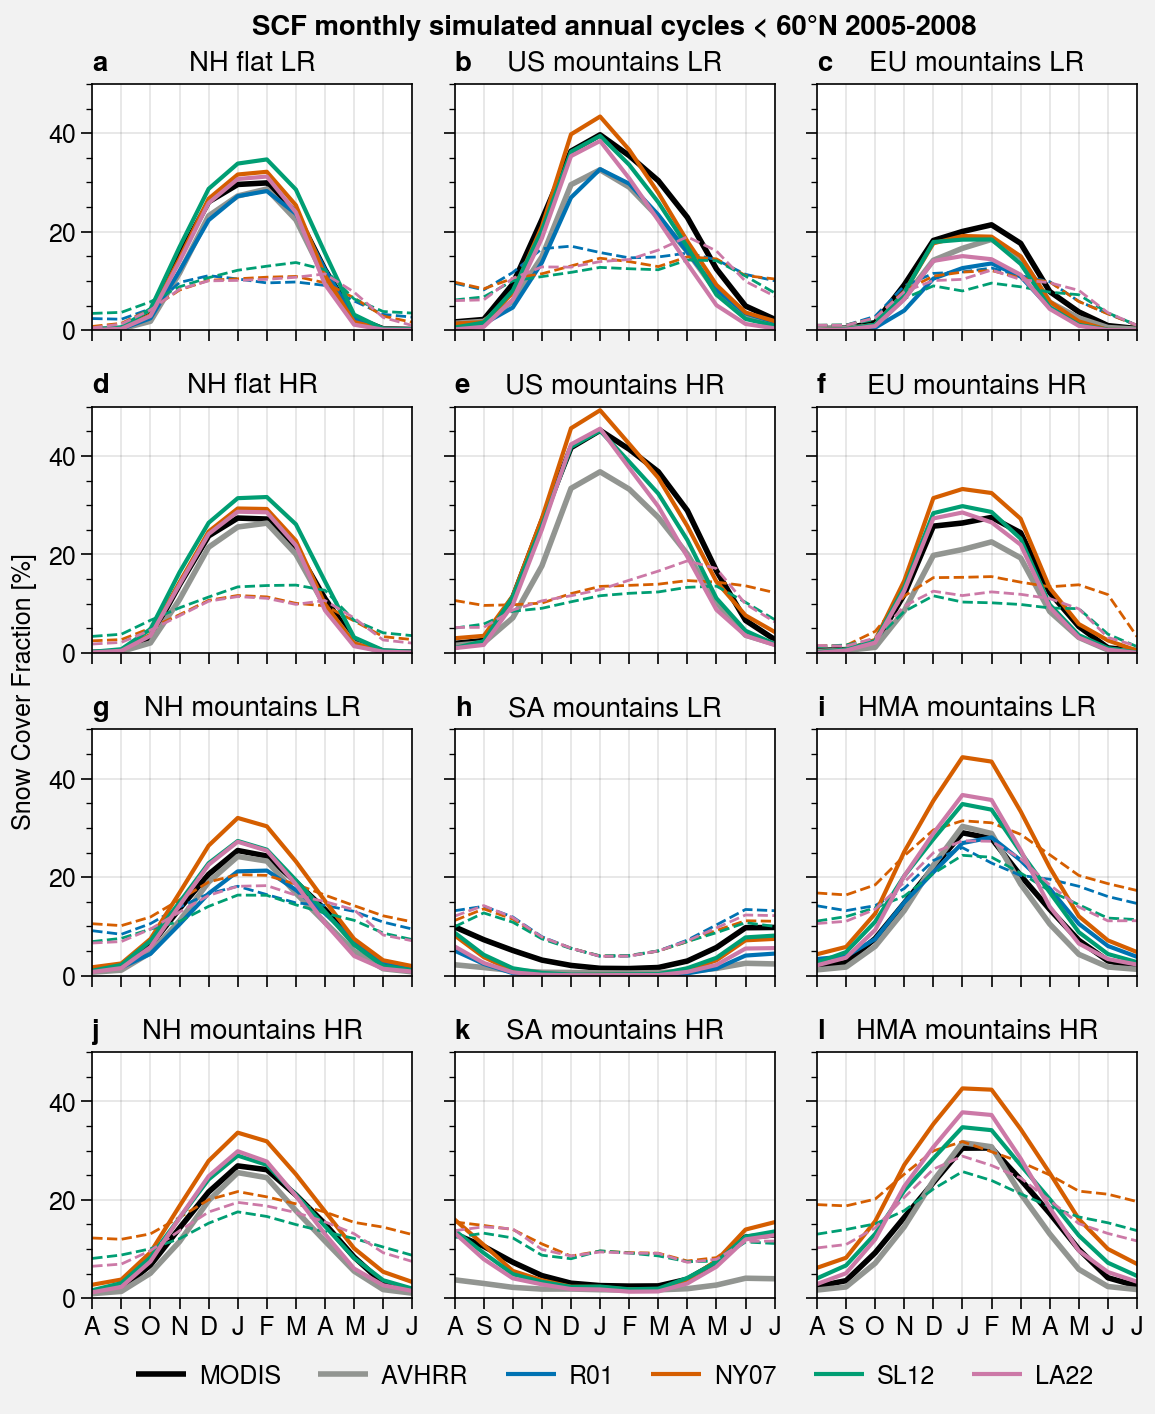

In [37]:
zones = ['US', 'EU', 'SA', 'HMA']

fig, axs = plot.subplots(ncols=3, nrows=4, aspect=1.3, axwidth=1.6)
roll = 5
ylim = (0, 50)

##########
### LR ###
##########
params = ['R01', 'NY07', 'SL12', 'LA22']

# Flat NH LR
axs[0].plot(ts_MODIS_NH_flat_LR.roll(month=roll).values, color='k', label='MODIS', lw=2)
axs[0].plot(ts_AVHRR_NH_flat_LR.roll(month=roll).values, color='gray', label='AVHRR', lw=2)
for i, param in enumerate(params):
    axs[0].plot(ds_NH_flat_LR[param].roll(month=roll).values, label=param, color='C'+str(i))
    axs[0].plot(ds_NH_flat_rmse_LR[param].roll(month=roll).values, ls='--', color='C'+str(i), lw=1)
    
axs[0].format(title='NH flat LR')

# Mountain NH LR
axs[6].plot(ts_MODIS_NH_mountain_LR.roll(month=roll).values, color='k', lw=2)
axs[6].plot(ts_AVHRR_NH_mountain_LR.roll(month=roll).values, color='gray', lw=2)
for i, param in enumerate(params):
    axs[6].plot(ds_NH_mountain_LR[param].roll(month=roll).values, color='C'+str(i))
    axs[6].plot(ds_NH_mountain_rmse_LR[param].roll(month=roll).values, ls='--', color='C'+str(i), lw=1)
    
axs[6].format(title='NH mountains LR')

# Mountain zones LR
for i, (i_ax, zone) in enumerate(zip([1, 2, 7, 8], zones)):
    axs[i_ax].plot(ds_list_MODIS_LR[i].roll(month=roll).values, color='k', lw=2)
    axs[i_ax].plot(ds_list_AVHRR_LR[i].roll(month=roll).values, color='gray', lw=2)
    for i_param, param in enumerate(params):
        axs[i_ax].plot(ds_list_LR[i][param].roll(month=roll).values, color='C'+str(i_param))
        axs[i_ax].plot(ds_list_rmse_LR[i][param].roll(month=roll).values, ls='--', color='C'+str(i_param), lw=1)

    axs[i_ax].format(title=zone+' mountains LR')

fig.legend(loc='b', frame=False, ncols=6, order='F', center=False)

##########
### HR ###
##########
params = ['NY07', 'SL12', 'LA22']
colors = ['C1', 'C2', 'C3']

# Flat NH HR
axs[3].plot(ts_MODIS_NH_flat_HR.roll(month=roll).values, color='k', label='MODIS', lw=2)
axs[3].plot(ts_AVHRR_NH_flat_HR.roll(month=roll).values, color='gray', label='AVHRR', lw=2)
for i, param in enumerate(params):
    axs[3].plot(ds_NH_flat_HR[param].roll(month=roll).values, label=param, color=colors[i])
    axs[3].plot(ds_NH_flat_rmse_HR[param].roll(month=roll).values, ls='--', color=colors[i], lw=1)
    
axs[3].format(title='NH flat HR')

# Mountain NH HR
axs[9].plot(ts_MODIS_NH_mountain_HR.roll(month=roll).values, color='k', lw=2)
axs[9].plot(ts_AVHRR_NH_mountain_HR.roll(month=roll).values, color='gray', lw=2)
for i, param in enumerate(params):
    axs[9].plot(ds_NH_mountain_HR[param].roll(month=roll).values, color=colors[i])
    axs[9].plot(ds_NH_mountain_rmse_HR[param].roll(month=roll).values, ls='--', color=colors[i], lw=1)
    
axs[9].format(title='NH mountains HR')

# Mountain zones HR
for i, (i_ax, zone) in enumerate(zip([4, 5, 10, 11], zones)):
    axs[i_ax].plot(ds_list_MODIS_HR[i].roll(month=roll).values, color='k', lw=2)
    axs[i_ax].plot(ds_list_AVHRR_HR[i].roll(month=roll).values, color='gray', lw=2)
    for i_param, param in enumerate(params):
        axs[i_ax].plot(ds_list_HR[i][param].roll(month=roll).values, color=colors[i_param])
        axs[i_ax].plot(ds_list_rmse_HR[i][param].roll(month=roll).values, ls='--', color=colors[i_param], lw=1)

    axs[i_ax].format(title=zone+' mountains HR')
    
for ax in axs:
    ax.autoscale(tight=True)
    
axs.format(
    xlocator='index', xformatter=[calendar.month_abbr[i][0] for i in ds_NH_mountain_HR[param].roll(month=roll).month.values], xtickminor=False,
    ylabel='Snow Cover Fraction [%]', ylim=ylim,
    suptitle='SCF monthly simulated annual cycles < 60°N '+str(period.start)+'-'+str(period.stop),
    abc=True
)

fig.save('img/fig_simu_ac_2005_2008_v0.jpg')

In [43]:
360 / 512

0.703125

In [44]:
180 / 360

0.5

In [45]:
u.deg2km(512, 360, 45)

{'x': 55.28438906056046, 'y': 55.59746332227937, 'units': 'km'}

In [ ]:
def deg2km(nlon, nlat, lat):
    # Gives the size of a grid cell in km at the corresponding latitude
    R_earth = 6371
    x = 2 * np.pi * R_earth / nlon * np.cos(np.deg2rad(lat))
    y = np.pi * R_earth / nlat
    return {'x': x, 'y': y, 'units': 'km'}

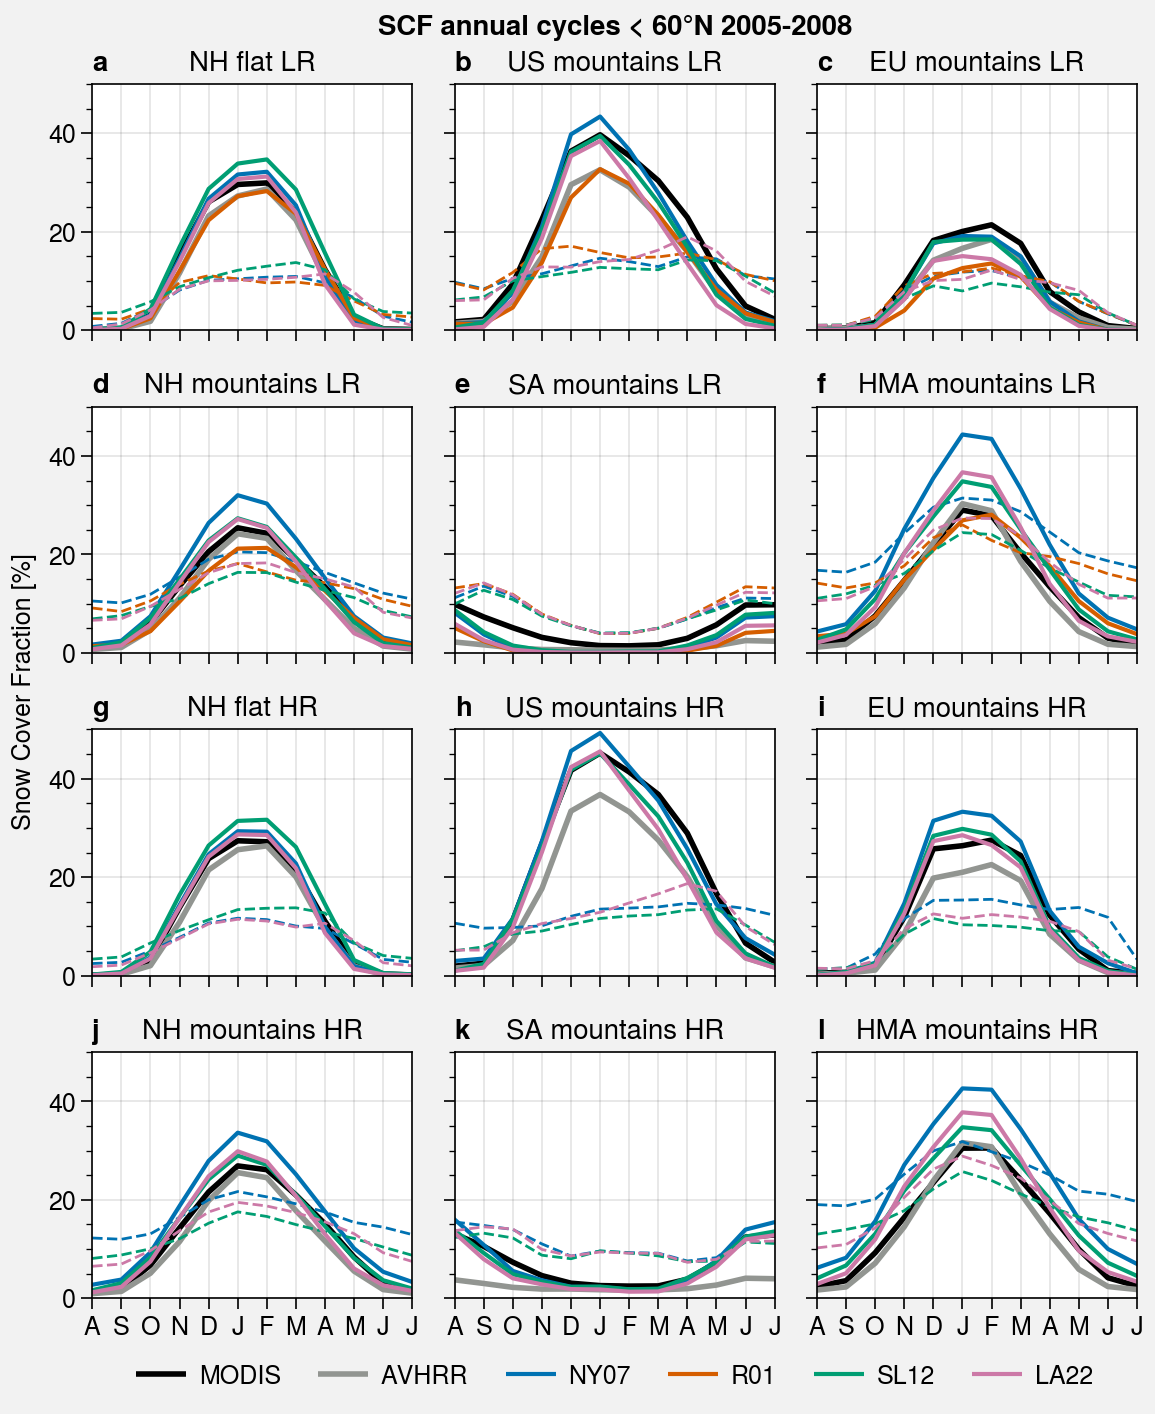

In [30]:
zones = ['US', 'EU', 'SA', 'HMA']

fig, axs = plot.subplots(ncols=3, nrows=4, aspect=1.3, axwidth=1.6)
roll = 5
ylim = (0, 50)

##########
### LR ###
##########
params = ['NY07', 'R01', 'SL12', 'LA22']

# Flat NH LR
axs[0].plot(ts_MODIS_NH_flat_LR.roll(month=roll).values, color='k', label='MODIS', lw=2)
axs[0].plot(ts_AVHRR_NH_flat_LR.roll(month=roll).values, color='gray', label='AVHRR', lw=2)
for i, param in enumerate(params):
    axs[0].plot(ds_NH_flat_LR[param].roll(month=roll).values, label=param, color='C'+str(i))
    axs[0].plot(ds_NH_flat_rmse_LR[param].roll(month=roll).values, ls='--', color='C'+str(i), lw=1)
    
axs[0].format(title='NH flat LR')

# Mountain NH LR
axs[3].plot(ts_MODIS_NH_mountain_LR.roll(month=roll).values, color='k', lw=2)
axs[3].plot(ts_AVHRR_NH_mountain_LR.roll(month=roll).values, color='gray', lw=2)
for i, param in enumerate(params):
    axs[3].plot(ds_NH_mountain_LR[param].roll(month=roll).values, color='C'+str(i))
    axs[3].plot(ds_NH_mountain_rmse_LR[param].roll(month=roll).values, ls='--', color='C'+str(i), lw=1)
    
axs[3].format(title='NH mountains LR')

# Mountain zones LR
for i, (i_ax, zone) in enumerate(zip([1, 2, 4, 5], zones)):
    axs[i_ax].plot(ds_list_MODIS_LR[i].roll(month=roll).values, color='k', lw=2)
    axs[i_ax].plot(ds_list_AVHRR_LR[i].roll(month=roll).values, color='gray', lw=2)
    for i_param, param in enumerate(params):
        axs[i_ax].plot(ds_list_LR[i][param].roll(month=roll).values, color='C'+str(i_param))
        axs[i_ax].plot(ds_list_rmse_LR[i][param].roll(month=roll).values, ls='--', color='C'+str(i_param), lw=1)

    axs[i_ax].format(title=zone+' mountains LR')

fig.legend(loc='b', frame=False, ncols=6, order='F', center=False)

##########
### HR ###
##########
params = ['NY07', 'SL12', 'LA22']
colors = ['C0', 'C2', 'C3']

# Flat NH HR
axs[6].plot(ts_MODIS_NH_flat_HR.roll(month=roll).values, color='k', label='MODIS', lw=2)
axs[6].plot(ts_AVHRR_NH_flat_HR.roll(month=roll).values, color='gray', label='AVHRR', lw=2)
for i, param in enumerate(params):
    axs[6].plot(ds_NH_flat_HR[param].roll(month=roll).values, label=param, color=colors[i])
    axs[6].plot(ds_NH_flat_rmse_HR[param].roll(month=roll).values, ls='--', color=colors[i], lw=1)
    
axs[6].format(title='NH flat HR')

# Mountain NH HR
axs[9].plot(ts_MODIS_NH_mountain_HR.roll(month=roll).values, color='k', lw=2)
axs[9].plot(ts_AVHRR_NH_mountain_HR.roll(month=roll).values, color='gray', lw=2)
for i, param in enumerate(params):
    axs[9].plot(ds_NH_mountain_HR[param].roll(month=roll).values, color=colors[i])
    axs[9].plot(ds_NH_mountain_rmse_HR[param].roll(month=roll).values, ls='--', color=colors[i], lw=1)
    
axs[9].format(title='NH mountains HR')

# Mountain zones HR
for i, (i_ax, zone) in enumerate(zip([7, 8, 10, 11], zones)):
    axs[i_ax].plot(ds_list_MODIS_HR[i].roll(month=roll).values, color='k', lw=2)
    axs[i_ax].plot(ds_list_AVHRR_HR[i].roll(month=roll).values, color='gray', lw=2)
    for i_param, param in enumerate(params):
        axs[i_ax].plot(ds_list_HR[i][param].roll(month=roll).values, color=colors[i_param])
        axs[i_ax].plot(ds_list_rmse_HR[i][param].roll(month=roll).values, ls='--', color=colors[i_param], lw=1)

    axs[i_ax].format(title=zone+' mountains HR')
    
for ax in axs:
    ax.autoscale(tight=True)
    
axs.format(
    xlocator='index', xformatter=[calendar.month_abbr[i][0] for i in ds_NH_mountain_HR[param].roll(month=roll).month.values], xtickminor=False,
    ylabel='Snow Cover Fraction [%]', ylim=ylim,
    suptitle='SCF annual cycles < 60°N '+str(period.start)+'-'+str(period.stop),
    abc=True
)